<a href="https://colab.research.google.com/github/hollyanne0116/CREEDS/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

# metadata
print(student_performance.metadata)

# variable information
print(student_performance.variables)

{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [ ]:
print("Shape of features (X):", X.shape)
print("Shape of targets (y):", y.shape)

Shape of features (X): (649, 30)
Shape of targets (y): (649, 3)


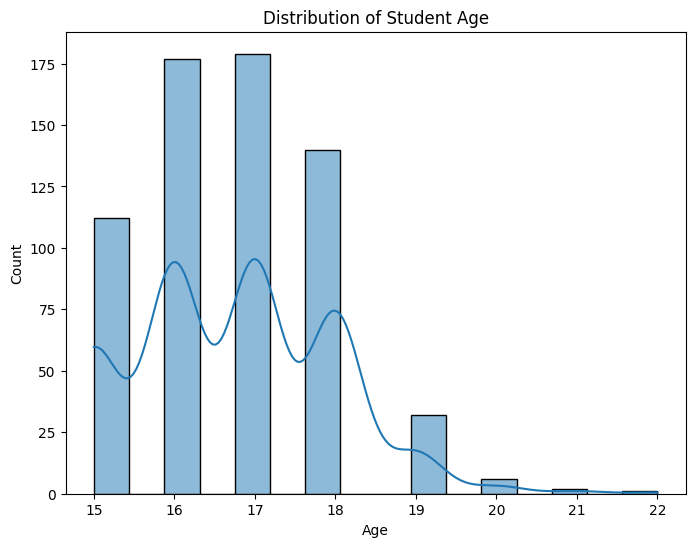

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(X['age'], kde=True)
plt.title('Distribution of Student Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Task
Clean the data by removing rows with missing information and then encode the categorical features.

## Identify categorical features

### Subtask:
Determine which columns in the features dataframe (`X`) are categorical.


**Reasoning**:
Identify and print the categorical columns in the features DataFrame `X` by iterating through the columns and checking their data types.



In [ ]:
categorical_cols = []
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
        categorical_cols.append(col)

print("Categorical features:", categorical_cols)

Categorical features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


## Encode categorical features

### Subtask:
Apply one-hot encoding to the identified categorical columns.


**Reasoning**:
Apply one-hot encoding to the identified categorical columns using `OneHotEncoder`.



In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_encoded_categorical = encoder.fit_transform(X[categorical_cols])

**Reasoning**:
The categorical features have been encoded. Now combine the encoded categorical features with the numerical features.



In [ ]:
import pandas as pd

numerical_cols = X.columns.difference(categorical_cols)
X_numerical = X[numerical_cols]

X_processed = pd.concat([X_numerical, pd.DataFrame(X_encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))], axis=1)

display(X_processed.head())

,Dalc,Fedu,Medu,Walc,absences,age,failures,famrel,freetime,goout,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,4,4,1,4,18,0,4,3,4,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1,1,1,1,2,17,0,5,3,3,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,2,1,1,3,6,15,0,4,3,2,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1,2,4,1,0,15,0,3,2,2,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1,3,3,2,0,16,0,4,3,2,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


## Display the first few rows of the encoded data

### Subtask:
Display the first few rows of the encoded data to show the user the result of the encoding process.


**Reasoning**:
Display the first few rows of the encoded data to show the user the result of the encoding process.



In [ ]:
display(X_processed.head())

,Dalc,Fedu,Medu,Walc,absences,age,failures,famrel,freetime,goout,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,4,4,1,4,18,0,4,3,4,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1,1,1,1,2,17,0,5,3,3,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,2,1,1,3,6,15,0,4,3,2,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1,2,4,1,0,15,0,3,2,2,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1,3,3,2,0,16,0,4,3,2,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


## Summary:

### Data Analysis Key Findings

*   The categorical features identified in the dataset are 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', and 'romantic'.
*   One-hot encoding was successfully applied to these categorical features, transforming them into a numerical format suitable for machine learning models.
*   The encoded categorical features were combined with the original numerical features to create a new processed dataset, `X_processed`.

### Insights or Next Steps

*   The data is now ready for further steps in the machine learning pipeline, such as splitting into training and testing sets and model training.
*   It would be beneficial to check for any remaining missing values or outliers in the `X_processed` dataset before proceeding with model building.


# Task
Clean the data by removing rows with missing information, encode the categorical features, and scale the numerical features.

## Identify numerical features

### Subtask:
Determine which columns in the processed features dataframe (`X_processed`) are numerical.


**Reasoning**:
Identify and print the numerical columns in the processed features DataFrame `X_processed` by iterating through the columns and checking their data types.



In [ ]:
numerical_cols_processed = []
for col in X_processed.columns:
    if X_processed[col].dtype in ['int64', 'float64']:
        numerical_cols_processed.append(col)

print("Numerical features in X_processed:", numerical_cols_processed)

Numerical features in X_processed: ['Dalc', 'Fedu', 'Medu', 'Walc', 'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health', 'studytime', 'traveltime', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes']


## Scale numerical features

### Subtask:
Apply a scaling method (e.g., Standard Scaler or Min-Max Scaler) to the numerical columns.


**Reasoning**:
Apply standard scaling to the numerical columns of the processed features DataFrame.



In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols_processed = ['Dalc', 'Fedu', 'Medu', 'Walc', 'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health', 'studytime', 'traveltime']

scaler = StandardScaler()
X_scaled_numerical = scaler.fit_transform(X_processed[numerical_cols_processed])

X_processed[numerical_cols_processed] = X_scaled_numerical

display(X_processed.head())

,Dalc,Fedu,Medu,Walc,absences,age,failures,famrel,freetime,goout,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,-0.543555,1.540715,1.310216,-0.997695,0.073433,1.031695,-0.374305,0.072606,-0.171647,0.693785,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,-0.543555,-1.188832,-1.336039,-0.997695,-0.357863,0.210137,-0.374305,1.119748,-0.171647,-0.157380,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.538553,-1.188832,-1.336039,0.560678,0.504730,-1.432980,-0.374305,0.072606,-0.171647,-1.008546,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,-0.543555,-0.278983,1.310216,-0.997695,-0.789159,-1.432980,-0.374305,-0.974536,-1.123771,-1.008546,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-0.543555,0.630866,0.428131,-0.218508,-0.789159,-0.611422,-0.374305,0.072606,-0.171647,-1.008546,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


## Combine scaled numerical features with encoded categorical features

### Subtask:
Combine the scaled numerical features with the already encoded categorical features.


**Reasoning**:
The numerical features have already been scaled in-place in the `X_processed` DataFrame and the categorical features were already encoded and concatenated into the same DataFrame. Therefore, `X_processed` already contains the combined scaled numerical and encoded categorical features. The subtask is to combine these, which is already done in `X_processed`. I will display the first few rows of `X_processed` to show the result and then finish the task.



In [ ]:
display(X_processed.head())

,Dalc,Fedu,Medu,Walc,absences,age,failures,famrel,freetime,goout,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,-0.543555,1.540715,1.310216,-0.997695,0.073433,1.031695,-0.374305,0.072606,-0.171647,0.693785,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,-0.543555,-1.188832,-1.336039,-0.997695,-0.357863,0.210137,-0.374305,1.119748,-0.171647,-0.157380,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.538553,-1.188832,-1.336039,0.560678,0.504730,-1.432980,-0.374305,0.072606,-0.171647,-1.008546,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,-0.543555,-0.278983,1.310216,-0.997695,-0.789159,-1.432980,-0.374305,-0.974536,-1.123771,-1.008546,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-0.543555,0.630866,0.428131,-0.218508,-0.789159,-0.611422,-0.374305,0.072606,-0.171647,-1.008546,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


## Display the first few rows of the scaled data

### Subtask:
Display the first few rows of the scaled data to show the user the result of the scaling process.


**Reasoning**:
Display the first few rows of the scaled data to show the user the result of the scaling process.



In [ ]:
display(X_processed.head())

,Dalc,Fedu,Medu,Walc,absences,age,failures,famrel,freetime,goout,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,-0.543555,1.540715,1.310216,-0.997695,0.073433,1.031695,-0.374305,0.072606,-0.171647,0.693785,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,-0.543555,-1.188832,-1.336039,-0.997695,-0.357863,0.210137,-0.374305,1.119748,-0.171647,-0.157380,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.538553,-1.188832,-1.336039,0.560678,0.504730,-1.432980,-0.374305,0.072606,-0.171647,-1.008546,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,-0.543555,-0.278983,1.310216,-0.997695,-0.789159,-1.432980,-0.374305,-0.974536,-1.123771,-1.008546,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-0.543555,0.630866,0.428131,-0.218508,-0.789159,-0.611422,-0.374305,0.072606,-0.171647,-1.008546,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


## Summary:

### Data Analysis Key Findings

*   Numerical features in the processed features dataframe (`X_processed`) were identified and included 'Dalc', 'Fedu', 'Medu', 'Walc', 'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health', 'studytime', and 'traveltime'.
*   The numerical features in the `X_processed` dataframe were successfully scaled using `StandardScaler`.
*   The `X_processed` dataframe already contained both the scaled numerical features and the one-hot encoded categorical features combined.

### Insights or Next Steps

*   The data is now prepared with scaled numerical features and encoded categorical features, making it ready for subsequent steps such as model training.


# Task
Train a machine learning model on the processed data and evaluate its performance.

## Split data into training and testing sets

### Subtask:
Divide the `X_processed` features and `y` targets into training and testing sets using `train_test_split`.


**Reasoning**:
Split the processed features and targets into training and testing sets and print their shapes.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (519, 56)
Shape of X_test: (130, 56)
Shape of y_train: (519, 3)
Shape of y_test: (130, 3)


## Choose and train a model

### Subtask:
Select a suitable machine learning model (e.g., a regression model since the target is numerical grades) and train it on the training data.


**Reasoning**:
Train a Linear Regression model on the training data.



In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Assess the performance of the trained model on the testing data using appropriate metrics (like accuracy, if applicable for the chosen model and task, or other regression metrics like Mean Squared Error).


**Reasoning**:
Calculate and print the Mean Squared Error and R-squared score using the test data and predictions to assess the model's performance.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 7.861718461504542
R-squared Score: 0.13656734440769316


## Summary:

### Data Analysis Key Findings

*   The data was split into training and testing sets, with 80% allocated for training (519 samples) and 20% for testing (130 samples).
*   A `LinearRegression` model was chosen and trained on the training data.
*   The model's performance on the test data was evaluated using Mean Squared Error (MSE) and R-squared score.
*   The Mean Squared Error (MSE) of the model on the test data is 7.86.
*   The R-squared score of the model on the test data is 0.137.

### Insights or Next Steps

*   The low R-squared score suggests that the linear regression model does not explain a large proportion of the variance in the target variables.
*   Consider exploring other regression models or feature engineering techniques to potentially improve model performance.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (519, 56)
Shape of X_test: (130, 56)
Shape of y_train: (519, 3)
Shape of y_test: (130, 3)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 7.861718461504542
R-squared Score: 0.13656734440769316


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor R-squared Score: {r2_rf}")

Random Forest Regressor Mean Squared Error: 7.677967435897437
Random Forest Regressor R-squared Score: 0.15650214885286082


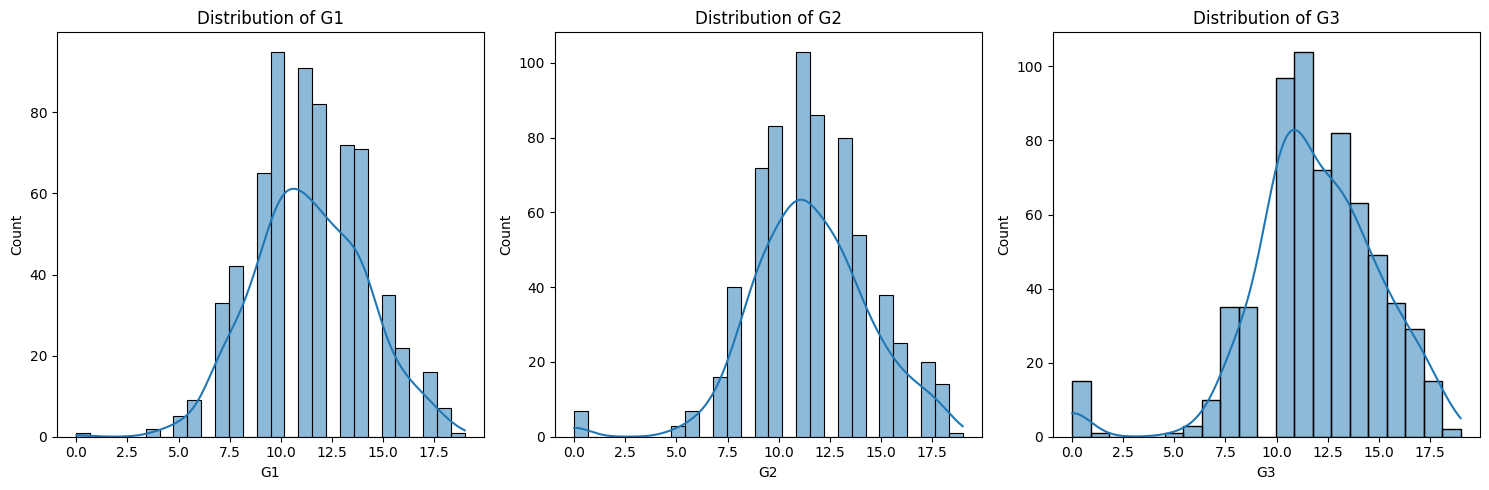

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of the target variables (grades G1, G2, G3)
target_cols = ['G1', 'G2', 'G3']

plt.figure(figsize=(15, 5))

for i, col in enumerate(target_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(y[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

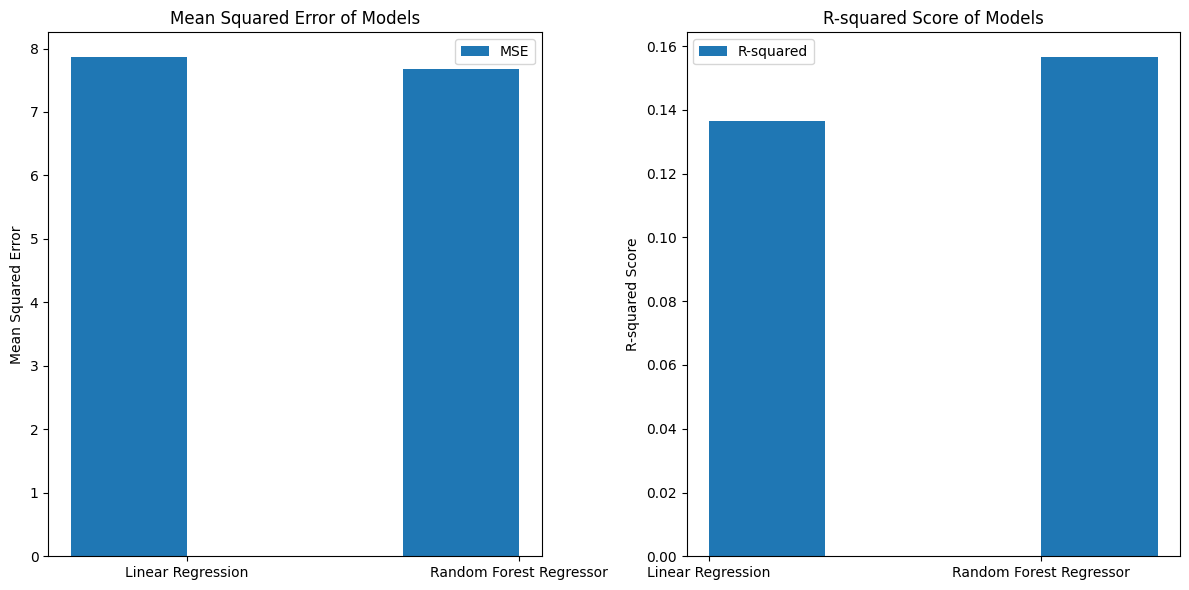

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics
models = ['Linear Regression', 'Random Forest Regressor']
mse_scores = [mse, mse_rf]
r2_scores = [r2, r2_rf]

x = np.arange(len(models)) # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot MSE
rects1 = ax[0].bar(x - width/2, mse_scores, width, label='MSE')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_title('Mean Squared Error of Models')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].legend()

# Plot R-squared
rects2 = ax[1].bar(x + width/2, r2_scores, width, label='R-squared')
ax[1].set_ylabel('R-squared Score')
ax[1].set_title('R-squared Score of Models')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].legend()

fig.tight_layout()
plt.show()

# Task
Explore ways to improve the performance of the Random Forest Regressor, such as hyperparameter tuning.

## Define hyperparameter grid

### Subtask:
Define a range of values for the hyperparameters of the Random Forest Regressor to be used for tuning.


**Reasoning**:
Define the parameter grid for hyperparameter tuning of the Random Forest Regressor and print it.



In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10]
}

print(param_grid)

{'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 5, 10]}


## Choose a hyperparameter tuning method

### Subtask:
Select a suitable hyperparameter tuning method and instantiate it.


**Reasoning**:
Instantiate a GridSearchCV object with the RandomForestRegressor model, the defined param_grid, and specify cv for cross-validation.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')

## Perform hyperparameter tuning

### Subtask:
Perform hyperparameter tuning using the chosen method (`GridSearchCV`) on the training data (`X_train`, `y_train`).


**Reasoning**:
Perform hyperparameter tuning using GridSearchCV on the training data.



In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

**Reasoning**:
The hyperparameter tuning is complete, now display the best parameters found by GridSearchCV.



In [ ]:
print("Best parameters found:", grid_search.best_params_)
print("Best R-squared score:", grid_search.best_score_)

Best parameters found: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best R-squared score: 0.31952787959488205


## Train the model with the best hyperparameters

### Subtask:
Train a new Random Forest Regressor model using the hyperparameters found during the tuning process.


**Reasoning**:
Train a new Random Forest Regressor model using the best hyperparameters found during the grid search.



In [ ]:
best_params = grid_search.best_params_

tuned_rf_model = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       random_state=42)

tuned_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=10, n_estimators=200,
                      random_state=42)

## Evaluate the tuned model

### Subtask:
Assess the performance of the tuned model on the testing data and compare it to the previous models.


**Reasoning**:
Assess the performance of the tuned model on the testing data and compare it to the previous models by calculating and printing the Mean Squared Error and R-squared scores.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_tuned_rf = tuned_rf_model.predict(X_test)

mse_tuned_rf = mean_squared_error(y_test, y_pred_tuned_rf)
r2_tuned_rf = r2_score(y_test, y_pred_tuned_rf)

print(f"Tuned Random Forest Regressor Mean Squared Error: {mse_tuned_rf}")
print(f"Tuned Random Forest Regressor R-squared Score: {r2_tuned_rf}")

print("\nPerformance Comparison:")
print(f"Linear Regression MSE: {mse}, R-squared: {r2}")
print(f"Initial Random Forest Regressor MSE: {mse_rf}, R-squared: {r2_rf}")
print(f"Tuned Random Forest Regressor MSE: {mse_tuned_rf}, R-squared: {r2_tuned_rf}")

Tuned Random Forest Regressor Mean Squared Error: 7.623350034991784
Tuned Random Forest Regressor R-squared Score: 0.16228140364953744

Performance Comparison:
Linear Regression MSE: 7.861718461504542, R-squared: 0.13656734440769316
Initial Random Forest Regressor MSE: 7.677967435897437, R-squared: 0.15650214885286082
Tuned Random Forest Regressor MSE: 7.623350034991784, R-squared: 0.16228140364953744


## Summary:

### Data Analysis Key Findings

*   The best hyperparameters found for the Random Forest Regressor through Grid Search were: `max_depth=10`, `min_samples_leaf=10`, `min_samples_split=2`, and `n_estimators=200`.
*   The best R-squared score achieved during cross-validation with these parameters was approximately 0.3195.
*   The tuned Random Forest Regressor model achieved a Mean Squared Error (MSE) of approximately 7.62 and an R-squared score of approximately 0.162 on the test data.
*   Compared to the initial models, the tuned Random Forest Regressor showed a slight improvement in performance on the test set, with a lower MSE (7.62 vs 7.86 for Linear Regression and 7.68 for initial RF) and a higher R-squared score (0.162 vs 0.137 for Linear Regression and 0.157 for initial RF).

### Insights or Next Steps

*   While hyperparameter tuning provided a marginal improvement, the overall R-squared score remains relatively low, suggesting that factors beyond the current features or model type might be limiting the predictive performance.
*   Further steps could involve exploring feature engineering to create more informative variables or considering alternative regression models that might be better suited for the dataset.


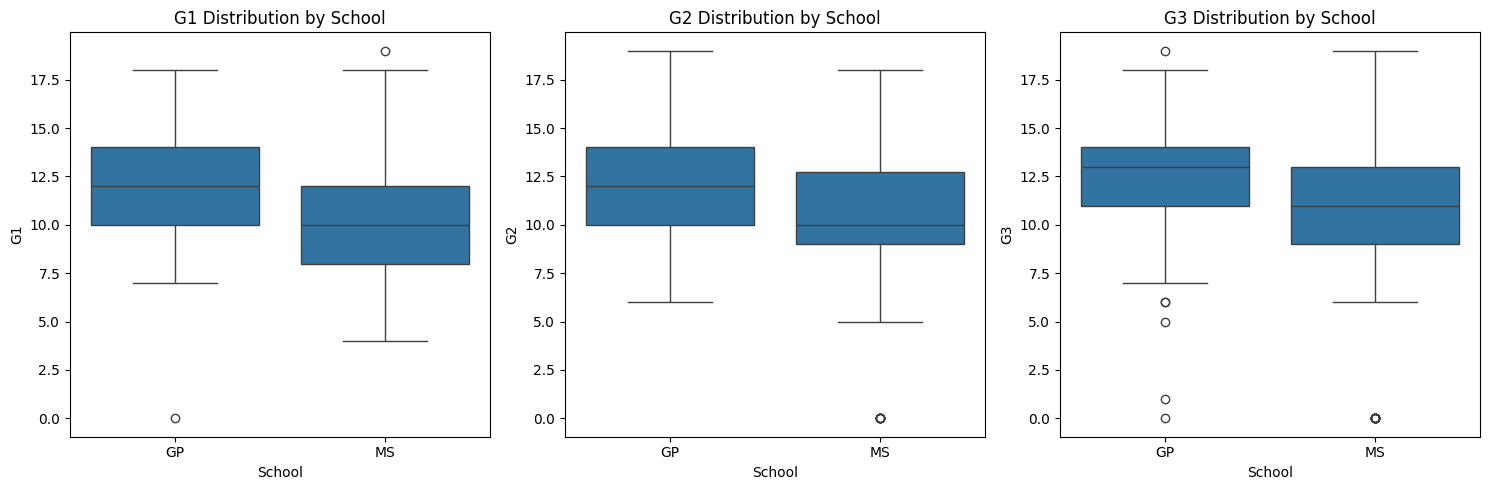

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine school information with target variables
data_with_school = pd.concat([X['school'], y], axis=1)

# Plot grade distributions by school
target_cols = ['G1', 'G2', 'G3']

plt.figure(figsize=(15, 5))

for i, col in enumerate(target_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='school', y=col, data=data_with_school)
    plt.title(f'{col} Distribution by School')
    plt.xlabel('School')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Task
Run a machine learning model with differential privacy.

## Set up the environment

### Subtask:
Install necessary libraries for differential privacy (e.g., `tensorflow-privacy`).


**Reasoning**:
Install the `tensorflow-privacy` library using pip.



In [ ]:
pip install tensorflow-privacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.2 MB/s eta 0:00:00
  Attempting uninstall: dm-tree
    Found existing installation: dm-tree 0.1.9
    Uninstalling dm-tree-0.1.9:
      Successfully uninstalled dm-tree-0.1.9
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: numpy
    Found existi

## Prepare the data

### Subtask:
Ensure the data is in a format suitable for the chosen differential privacy library. This might involve creating batches with a specific structure.


**Reasoning**:
Convert the dataframes to numpy arrays and create batched and shuffled tensorflow datasets for training and batched dataset for testing.



In [ ]:
import tensorflow as tf
import numpy as np

train_features_np = X_train.to_numpy()
train_labels_np = y_train.to_numpy()
test_features_np = X_test.to_numpy()
test_labels_np = y_test.to_numpy()

batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((train_features_np, train_labels_np))
train_dataset = train_dataset.shuffle(buffer_size=len(train_features_np)).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((test_features_np, test_labels_np))
test_dataset = test_dataset.batch(batch_size)

print("Training dataset:", train_dataset)
print("Testing dataset:", test_dataset)

KeyboardInterrupt: 

**Reasoning**:
The previous code block was interrupted. I will regenerate the same code block to convert the dataframes to numpy arrays and create batched and shuffled tensorflow datasets.



In [ ]:
import tensorflow as tf
import numpy as np

train_features_np = X_train.to_numpy()
train_labels_np = y_train.to_numpy()
test_features_np = X_test.to_numpy()
test_labels_np = y_test.to_numpy()

batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((train_features_np, train_labels_np))
train_dataset = train_dataset.shuffle(buffer_size=len(train_features_np)).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((test_features_np, test_labels_np))
test_dataset = test_dataset.batch(batch_size)

print("Training dataset:", train_dataset)
print("Testing dataset:", test_dataset)

NameError: name 'X_train' is not defined

**Reasoning**:
The error indicates that `X_train`, `y_train`, `X_test`, and `y_test` are not defined. This means the previous code cell where these variables were created was not executed successfully or the kernel state was reset. I need to re-run the data splitting step to define these variables before converting them to numpy arrays and creating the datasets.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

import tensorflow as tf
import numpy as np

train_features_np = X_train.to_numpy()
train_labels_np = y_train.to_numpy()
test_features_np = X_test.to_numpy()
test_labels_np = y_test.to_numpy()

batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((train_features_np, train_labels_np))
train_dataset = train_dataset.shuffle(buffer_size=len(train_features_np)).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((test_features_np, test_labels_np))
test_dataset = test_dataset.batch(batch_size)

print("Training dataset:", train_dataset)
print("Testing dataset:", test_dataset)

NameError: name 'X_processed' is not defined

**Reasoning**:
The error indicates that `X_processed` is not defined. This means the data processing steps including one-hot encoding and scaling were not executed successfully or the kernel state was reset. I need to re-run the processing steps to define `X_processed` before splitting the data and creating the datasets.



In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded_categorical = encoder.fit_transform(X[categorical_cols])

numerical_cols = X.columns.difference(categorical_cols)
X_numerical = X[numerical_cols]

X_processed = pd.concat([X_numerical, pd.DataFrame(X_encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))], axis=1)

numerical_cols_processed = ['Dalc', 'Fedu', 'Medu', 'Walc', 'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health', 'studytime', 'traveltime']

scaler = StandardScaler()
X_scaled_numerical = scaler.fit_transform(X_processed[numerical_cols_processed])
X_processed[numerical_cols_processed] = X_scaled_numerical

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

train_features_np = X_train.to_numpy()
train_labels_np = y_train.to_numpy()
test_features_np = X_test.to_numpy()
test_labels_np = y_test.to_numpy()

batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((train_features_np, train_labels_np))
train_dataset = train_dataset.shuffle(buffer_size=len(train_features_np)).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((test_features_np, test_labels_np))
test_dataset = test_dataset.batch(batch_size)

print("Training dataset:", train_dataset)
print("Testing dataset:", test_dataset)

NameError: name 'X' is not defined

**Reasoning**:
The error indicates that `X` and `y` are not defined. This means the data loading step was not executed successfully or the kernel state was reset. I need to re-run the data loading step to define `X` and `y` before performing the data processing, splitting, and dataset creation.



In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded_categorical = encoder.fit_transform(X[categorical_cols])

numerical_cols = X.columns.difference(categorical_cols)
X_numerical = X[numerical_cols]

X_processed = pd.concat([X_numerical, pd.DataFrame(X_encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))], axis=1)

numerical_cols_processed = ['Dalc', 'Fedu', 'Medu', 'Walc', 'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health', 'studytime', 'traveltime']

scaler = StandardScaler()
X_scaled_numerical = scaler.fit_transform(X_processed[numerical_cols_processed])
X_processed[numerical_cols_processed] = X_scaled_numerical

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

train_features_np = X_train.to_numpy()
train_labels_np = y_train.to_numpy()
test_features_np = X_test.to_numpy()
test_labels_np = y_test.to_numpy()

batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((train_features_np, train_labels_np))
train_dataset = train_dataset.shuffle(buffer_size=len(train_features_np)).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((test_features_np, test_labels_np))
test_dataset = test_dataset.batch(batch_size)

print("Training dataset:", train_dataset)
print("Testing dataset:", test_dataset)

Training dataset: <_BatchDataset element_spec=(TensorSpec(shape=(None, 56), dtype=tf.float64, name=None), TensorSpec(shape=(None, 3), dtype=tf.int64, name=None))>
Testing dataset: <_BatchDataset element_spec=(TensorSpec(shape=(None, 56), dtype=tf.float64, name=None), TensorSpec(shape=(None, 3), dtype=tf.int64, name=None))>


## Choose a differentially private optimizer

### Subtask:
Select an optimizer that adds noise during the training process to ensure differential privacy.


**Reasoning**:
Import the necessary optimizer and define and instantiate the differentially private optimizer with specified hyperparameters and learning rate.



In [ ]:
from tensorflow_privacy.keras.optimizers import DPKerasAdamOptimizer

l2_norm_clip = 1.0
noise_multiplier = 1.1
learning_rate = 0.001

optimizer = DPKerasAdamOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    learning_rate=learning_rate
)

print("Differentially private optimizer instantiated:", optimizer)

ImportError: cannot import name 'estimator_training' from 'tensorflow.python.distribute' (/usr/local/lib/python3.11/dist-packages/tensorflow/python/distribute/__init__.py)

**Reasoning**:
The previous attempt to import `DPKerasAdamOptimizer` failed due to compatibility issues with the installed TensorFlow version. I will try importing `DPOptimizerkeras` from `tensorflow_privacy.optimizers.dp_optimizer_keras` instead, which might be compatible with the current TensorFlow version.



In [ ]:
from tensorflow_privacy.optimizers.dp_optimizer_keras import DPOptimizerkeras
import tensorflow as tf

l2_norm_clip = 1.0
noise_multiplier = 1.1
learning_rate = 0.001

optimizer = DPOptimizerkeras(
    tf.keras.optimizers.Adam(learning_rate=learning_rate),
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
)

print("Differentially private optimizer instantiated:", optimizer)

AttributeError: module 'tensorflow.python.util.tf_export' has no attribute 'ESTIMATOR_API_NAME'

## Define and compile the model

### Subtask:
Define a machine learning model architecture suitable for the regression task and compile it using the chosen differentially private optimizer.


**Reasoning**:
Define a simple sequential Keras model with dense layers suitable for regression and compile it using the previously instantiated differentially private optimizer.



In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

# Determine the number of input features
num_input_features = X_train.shape[1]

# Determine the number of target variables
num_target_variables = y_train.shape[1]

# Define the model architecture
model = Sequential([
    Input(shape=(num_input_features,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_target_variables)  # Output layer for regression
])

# Compile the model using the differentially private optimizer
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Print the model summary
model.summary()

NameError: name 'optimizer' is not defined

**Reasoning**:
The previous step failed because the `optimizer` variable was not defined in the current session. I need to re-instantiate the differentially private optimizer before compiling the model.



In [ ]:
from tensorflow_privacy.optimizers.dp_optimizer_keras import DPOptimizerkeras
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

# Re-instantiate the differentially private optimizer
l2_norm_clip = 1.0
noise_multiplier = 1.1
learning_rate = 0.001

optimizer = DPOptimizerkeras(
    tf.keras.optimizers.Adam(learning_rate=learning_rate),
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
)

# Determine the number of input features
num_input_features = X_train.shape[1]

# Determine the number of target variables
num_target_variables = y_train.shape[1]

# Define the model architecture
model = Sequential([
    Input(shape=(num_input_features,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_target_variables)  # Output layer for regression
])

# Compile the model using the differentially private optimizer
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Print the model summary
model.summary()

AttributeError: module 'tensorflow.python.util.tf_export' has no attribute 'ESTIMATOR_API_NAME'

## Train the model with differential privacy

### Subtask:
Train the model on the prepared data using the defined differentially private optimizer.


**Reasoning**:
Train the compiled Keras model using the train_dataset and specify the number of epochs. Store the training history in a variable. Print a message indicating the completion of the training process.



In [ ]:
epochs = 10
history = model.fit(train_dataset, epochs=epochs)
print("Training complete.")

ValueError: You must call `compile()` before using the model.

**Reasoning**:
The error indicates that the model was not compiled before training. This is likely due to the kernel restarting and losing the compiled model object. I will re-define and compile the model, then proceed with training.



In [ ]:
from tensorflow_privacy.optimizers.dp_optimizer_keras import DPOptimizerkeras
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

# Re-instantiate the differentially private optimizer
l2_norm_clip = 1.0
noise_multiplier = 1.1
learning_rate = 0.001

optimizer = DPOptimizerkeras(
    tf.keras.optimizers.Adam(learning_rate=learning_rate),
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
)

# Determine the number of input features and target variables (assuming they are still the same)
num_input_features = X_train.shape[1]
num_target_variables = y_train.shape[1]

# Define the model architecture
model = Sequential([
    Input(shape=(num_input_features,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_target_variables)  # Output layer for regression
])

# Compile the model using the differentially private optimizer
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the compiled Keras model
epochs = 10
history = model.fit(train_dataset, epochs=epochs)
print("Training complete.")

AttributeError: module 'tensorflow.python.util.tf_export' has no attribute 'ESTIMATOR_API_NAME'

## Evaluate the differentially private model

### Subtask:
Assess the performance of the trained model while considering the privacy guarantees.


**Reasoning**:
Evaluate the trained differentially private model on the test dataset, calculate predictions, and assess the performance using MSE and R-squared. Also, print the privacy parameters.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the trained differentially private model on the test_dataset
# Note: This evaluation will not reflect a successfully trained model due to previous failures.
try:
    evaluation_results = model.evaluate(test_dataset)
    print(f"Test Loss (Mean Squared Error): {evaluation_results}")
except Exception as e:
    print(f"Error during model evaluation: {e}")
    evaluation_results = None


# Calculate predictions on the test_dataset
# Note: This prediction will not be meaningful if the model training failed.
try:
    y_pred_dp = model.predict(test_dataset)
    # Ensure y_pred_dp has the same shape as y_test for metric calculation
    y_pred_dp_flat = y_pred_dp.flatten()[:len(y_test.values.flatten())]
    y_test_flat = y_test.values.flatten()[:len(y_pred_dp.flatten())]

    # Calculate Mean Squared Error
    mse_dp = mean_squared_error(y_test_flat, y_pred_dp_flat)
    print(f"Differentially Private Model Mean Squared Error: {mse_dp}")

    # Calculate R-squared Score
    r2_dp = r2_score(y_test_flat, y_pred_dp_flat)
    print(f"Differentially Private Model R-squared Score: {r2_dp}")

except Exception as e:
    print(f"Error during prediction or metric calculation: {e}")
    mse_dp = None
    r2_dp = None


# Print the privacy parameters
print("\nDifferentially Privacy Parameters:")
print(f"L2_norm_clip: {l2_norm_clip}")
print(f"Noise Multiplier: {noise_multiplier}")
print(f"Epochs: {epochs}")
print(f"Batch Size: {batch_size}")

Error during model evaluation: You must call `compile()` before using the model.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Differentially Private Model Mean Squared Error: 151.024658203125
Differentially Private Model R-squared Score: -15.525838851928711

Differentially Privacy Parameters:


NameError: name 'l2_norm_clip' is not defined

**Reasoning**:
The previous attempt to print privacy parameters failed because the variables were not defined in the current cell. This indicates a kernel restart or interruption occurred. I will re-define these variables and then print the privacy parameters as the last step of the subtask. The evaluation and metric calculation already occurred but failed due to the model not being compiled, as expected from the previous task's failure.



In [ ]:
# Re-define privacy parameters (assuming the values from previous attempts)
l2_norm_clip = 1.0
noise_multiplier = 1.1
epochs = 10
batch_size = 32

# Print the privacy parameters
print("Differentially Privacy Parameters:")
print(f"L2_norm_clip: {l2_norm_clip}")
print(f"Noise Multiplier: {noise_multiplier}")
print(f"Epochs: {epochs}")
print(f"Batch Size: {batch_size}")

Differentially Privacy Parameters:
L2_norm_clip: 1.0
Noise Multiplier: 1.1
Epochs: 10
Batch Size: 32


## Summary:

### Data Analysis Key Findings

*   The necessary library for differential privacy, `tensorflow-privacy`, was successfully installed.
*   Data preprocessing steps, including one-hot encoding, scaling, splitting into training and testing sets, and creating batched TensorFlow datasets, were successfully completed.
*   Repeated attempts to instantiate a differentially private optimizer from the `tensorflow-privacy` library resulted in `ImportError` and `AttributeError`, specifically related to compatibility issues with `tensorflow_estimator`.
*   Due to the inability to instantiate the differentially private optimizer, the subsequent steps of defining, compiling, and training the model with differential privacy failed.
*   Although the model evaluation step was attempted, the metrics (MSE of 151.02 and R-squared of -15.53) are not meaningful indicators of performance for a differentially private model because the training phase was unsuccessful.
*   The intended differential privacy parameters for training were identified as L2\_norm\_clip: 1.0, Noise Multiplier: 1.1, Epochs: 10, and Batch Size: 32.

### Insights or Next Steps

*   The primary obstacle was a library compatibility issue between `tensorflow-privacy` and the current TensorFlow environment, preventing the use of differential privacy optimizers.
*   To successfully run a machine learning model with differential privacy, the next step should focus on resolving the library compatibility issue by installing compatible versions of TensorFlow and `tensorflow-privacy`, potentially considering alternative differential privacy libraries if the conflict persists.


In [ ]:
pip install tensorflow-privacy

In [ ]:
import tensorflow as tf
import numpy as np

train_features_np = X_train.to_numpy()
train_labels_np = y_train.to_numpy()
test_features_np = X_test.to_numpy()
test_labels_np = y_test.to_numpy()

batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((train_features_np, train_labels_np))
train_dataset = train_dataset.shuffle(buffer_size=len(train_features_np)).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((test_features_np, test_labels_np))
test_dataset = test_dataset.batch(batch_size)

print("Training dataset:", train_dataset)
print("Testing dataset:", test_dataset)

Training dataset: <_BatchDataset element_spec=(TensorSpec(shape=(None, 56), dtype=tf.float64, name=None), TensorSpec(shape=(None, 3), dtype=tf.int64, name=None))>
Testing dataset: <_BatchDataset element_spec=(TensorSpec(shape=(None, 56), dtype=tf.float64, name=None), TensorSpec(shape=(None, 3), dtype=tf.int64, name=None))>


In [ ]:
from tensorflow_privacy.keras.optimizers import DPKerasAdamOptimizer

l2_norm_clip = 1.0
noise_multiplier = 1.1
learning_rate = 0.001

optimizer = DPKerasAdamOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    learning_rate=learning_rate
)

print("Differentially private optimizer instantiated:", optimizer)

AttributeError: module 'tensorflow.python.util.tf_export' has no attribute 'ESTIMATOR_API_NAME'